In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base = "./v3/"
clients_with = "30_issda"
wall_time = 86400
#wall_time = 1000

In [3]:
df = pd.read_csv("./v3_all.csv")

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))

df = df[(df["clients"].isin(clients))]
df = df[df["wall_time"] == wall_time]
#df.oracle = df.oracle.apply(lambda x: pd.Series())

df = df[(df.clients_size == 4500)]

df

Unnamed: 0                                               expe  \
63459            0   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63460            0   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63461            0   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63462            0   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63463            1   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
...            ...                                                ...   
100562           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100563           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100564           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100565           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100566           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   

              clients  clients_size clients_subset  agg_size  agg_size_pc  \
63459   30_issda-4500          4500     first-4500       450           10   
63460   30_issda-4500          4500     first-4500       450           10   
63461   30_issda-4500          4500     first-4500       450           10   
63462   30_issda-4500          4500     first-4500      1350           30   
63463   30_issda-4500          4500     first-4500      1575           35   
...               ...           ...            ...       ...          ...   
100562  30_issda-4500          4500     first-4500       900           20   
100563  30_issda-4500          4500     first-4500       675           15   
100564  30_issda-4500          4500     first-4500       450           10   
100565  30_issda-4500          4500     first-4500       675           15   
100566  30_issda-4500          4500     first-4500       225            5   

       method            days  days_size  ...  wall_hit wall_time  pooled  \
63459     rng  num-start-3150       3150  ...     False     86400    True   
63460     rng   num-start-450        450  ...      True     86400    True   
63461     rng   num-start-450        450  ...      True     86400    True   
63462     rng  num-start-2700       2700  ...     False     86400    True   
63463     rng  num-start-3600       3600  ...     False     86400    True   
...       ...             ...        ...  ...       ...       ...     ...   
100562    rng  num-start-2700       2700  ...     False     86400    True   
100563    rng  num-start-2250       2250  ...     False     86400    True   
100564    rng  num-start-4050       4050  ...     False     86400    True   
100565    rng   num-start-450        450  ...      True     86400    True   
100566    rng  num-start-4050       4050  ...     False     86400    True   

        pool_size        uuid  optimal  valid_sums  days_size_pc  infeasible  \
63459         100  9f1b80b8e2      1.0         1.0            70         NaN   
63460         100  7cb69420eb      0.0         0.0            10         NaN   
63461         100  5a34d5419e      0.0         0.0            10         NaN   
63462         100  5372e781ce      1.0         1.0            60         NaN   
63463         100  320d8593a6      1.0         1.0            80         NaN   
...           ...         ...      ...         ...           ...         ...   
100562        100  0606f4129b      1.0         1.0            60         0.0   
100563        100  6bb553c8c2      1.0         1.0            50         0.0   
100564        100  319961402c      1.0         1.0            90         0.0   
100565        100  5a978eb8a0      0.0         0.0            10         0.0   
100566        100  8bf2ba751b      1.0         1.0            90         0.0   

        Unnamed: 0.1  
63459            NaN  
63460            NaN  
63461            NaN  
63462            NaN  
63463            NaN  
...              ...  
100562           NaN  
100563           NaN  
100564           NaN  
100565           NaN  
100566           NaN  

[358 rows x 31 columns]

In [4]:
df[(df.success == False) ].nsols

63460     0
63461     0
63464     0
63474     0
63475     0
         ..
100547    0
100548    0
100555    0
100560    0
100565    0
Name: nsols, Length: 80, dtype: int64

In [5]:
df_with_sols = df[(df["nsols"] > 1) & (df.success == True) & (df.nsols < df.pool_size)].copy()
df_with_sols

Unnamed: 0                                               expe  \
63462            0   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63465            3   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63466            4   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63467            5   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63473            0   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
...            ...                                                ...   
100557           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100559           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100561           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100562           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100563           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   

              clients  clients_size clients_subset  agg_size  agg_size_pc  \
63462   30_issda-4500          4500     first-4500      1350           30   
63465   30_issda-4500          4500     first-4500      2250           50   
63466   30_issda-4500          4500     first-4500      1575           35   
63467   30_issda-4500          4500     first-4500      1350           30   
63473   30_issda-4500          4500     first-4500      1575           35   
...               ...           ...            ...       ...          ...   
100557  30_issda-4500          4500     first-4500      1575           35   
100559  30_issda-4500          4500     first-4500      2250           50   
100561  30_issda-4500          4500     first-4500      1350           30   
100562  30_issda-4500          4500     first-4500       900           20   
100563  30_issda-4500          4500     first-4500       675           15   

       method            days  days_size  ...  wall_hit wall_time  pooled  \
63462     rng  num-start-2700       2700  ...     False     86400    True   
63465     rng  num-start-2700       2700  ...     False     86400    True   
63466     rng  num-start-3600       3600  ...     False     86400    True   
63467     rng  num-start-2700       2700  ...     False     86400    True   
63473     rng  num-start-2700       2700  ...     False     86400    True   
...       ...             ...        ...  ...       ...       ...     ...   
100557    rng  num-start-2700       2700  ...     False     86400    True   
100559    rng  num-start-4500       4500  ...     False     86400    True   
100561    rng  num-start-4050       4050  ...     False     86400    True   
100562    rng  num-start-2700       2700  ...     False     86400    True   
100563    rng  num-start-2250       2250  ...     False     86400    True   

        pool_size        uuid  optimal  valid_sums  days_size_pc  infeasible  \
63462         100  5372e781ce      1.0         1.0            60         NaN   
63465         100  edd939f8bd      1.0         1.0            60         NaN   
63466         100  94d10b4c5d      1.0         1.0            80         NaN   
63467         100  414a5b8038      1.0         1.0            60         NaN   
63473         100  5fd05a21f4      1.0         1.0            60         NaN   
...           ...         ...      ...         ...           ...         ...   
100557        100  d0829a7539      1.0         1.0            60         0.0   
100559        100  bdc8464d08      1.0         1.0           100         0.0   
100561        100  52802d439a      1.0         1.0            90         0.0   
100562        100  0606f4129b      1.0         1.0            60         0.0   
100563        100  6bb553c8c2      1.0         1.0            50         0.0   

        Unnamed: 0.1  
63462            NaN  
63465            NaN  
63466            NaN  
63467            NaN  
63473            NaN  
...              ...  
100557           NaN  
100559           NaN  
100561           NaN  
100562           NaN  
100563           NaN  

[132 rows x 31 columns]

In [6]:
df_with_sols.nsols.max()

3

In [7]:
df_with_sols[df_with_sols.nsols == df_with_sols.nsols.max()]

Unnamed: 0                                              expe  \
63601           0  ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   

             clients  clients_size clients_subset  agg_size  agg_size_pc  \
63601  30_issda-4500          4500     first-4500       225            5   

      method           days  days_size  ...  wall_hit wall_time  pooled  \
63601    rng  num-start-900        900  ...     False     86400    True   

       pool_size        uuid  optimal  valid_sums  days_size_pc  infeasible  \
63601        100  4ca3124c04      1.0         1.0            20         NaN   

       Unnamed: 0.1  
63601           NaN  

[1 rows x 31 columns]

In [8]:
def compute_scores(x):
    path = os.path.join(base, x.expe[8:], "sols", x.uuid) + ".npy"
    
    oracle = list(x.oracle)
    scores = []
    freq = {}
    
    with open(path, "rb") as f:
        sols = np.load(f)
        
        for sol in sols:
            # Clients frequency
            for client in sol:
                if client not in freq:
                    freq[client] = 0
                freq[client] += 1                
        
        for k in freq:
            freq[k] = freq[k] / len(sols)
            
        freqs = freq
        
        vals = [freqs[k] for k in freqs]
        if len(vals) > 0:
            m = max(vals)
        else:
            m = 0
    
    return pd.Series({
        "freqs": freq,
        "freqs_max": m,
        "random_guess": x.agg_size / x.clients_size,
    })

df_s = df_with_sols.merge(df_with_sols.apply(compute_scores, axis=1), left_index=True, right_index=True)
df_s

Unnamed: 0                                               expe  \
63462            0   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63465            3   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63466            4   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63467            5   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63473            0   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
...            ...                                                ...   
100557           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100559           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100561           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100562           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100563           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   

              clients  clients_size clients_subset  agg_size  agg_size_pc  \
63462   30_issda-4500          4500     first-4500      1350           30   
63465   30_issda-4500          4500     first-4500      2250           50   
63466   30_issda-4500          4500     first-4500      1575           35   
63467   30_issda-4500          4500     first-4500      1350           30   
63473   30_issda-4500          4500     first-4500      1575           35   
...               ...           ...            ...       ...          ...   
100557  30_issda-4500          4500     first-4500      1575           35   
100559  30_issda-4500          4500     first-4500      2250           50   
100561  30_issda-4500          4500     first-4500      1350           30   
100562  30_issda-4500          4500     first-4500       900           20   
100563  30_issda-4500          4500     first-4500       675           15   

       method            days  days_size  ...  pool_size        uuid  optimal  \
63462     rng  num-start-2700       2700  ...        100  5372e781ce      1.0   
63465     rng  num-start-2700       2700  ...        100  edd939f8bd      1.0   
63466     rng  num-start-3600       3600  ...        100  94d10b4c5d      1.0   
63467     rng  num-start-2700       2700  ...        100  414a5b8038      1.0   
63473     rng  num-start-2700       2700  ...        100  5fd05a21f4      1.0   
...       ...             ...        ...  ...        ...         ...      ...   
100557    rng  num-start-2700       2700  ...        100  d0829a7539      1.0   
100559    rng  num-start-4500       4500  ...        100  bdc8464d08      1.0   
100561    rng  num-start-4050       4050  ...        100  52802d439a      1.0   
100562    rng  num-start-2700       2700  ...        100  0606f4129b      1.0   
100563    rng  num-start-2250       2250  ...        100  6bb553c8c2      1.0   

        valid_sums  days_size_pc  infeasible  Unnamed: 0.1  \
63462          1.0            60         NaN           NaN   
63465          1.0            60         NaN           NaN   
63466          1.0            80         NaN           NaN   
63467          1.0            60         NaN           NaN   
63473          1.0            60         NaN           NaN   
...            ...           ...         ...           ...   
100557         1.0            60         0.0           NaN   
100559         1.0           100         0.0           NaN   
100561         1.0            90         0.0           NaN   
100562         1.0            60         0.0           NaN   
100563         1.0            50         0.0           NaN   

                                                    freqs  freqs_max  \
63462   {'2': 1.0, '4': 1.0, '9': 1.0, '10': 1.0, '11'...        1.0   
63465   {'5': 1.0, '7': 1.0, '12': 1.0, '13': 1.0, '16...        1.0   
63466   {'5': 1.0, '7': 1.0, '12': 1.0, '13': 1.0, '18...        1.0   
63467   {'5': 1.0, '7': 1.0, '13': 1.0, '18': 1.0, '25...        1.0   
63473   {'5': 1.0, '7': 1.0, '12': 1.0, '13': 1.0, '18...        1.0   
...                                                   ..

In [9]:
df_s.score_min.max()

0.9789158061138374

In [10]:
df_s[(df_s.score_min == df_s.score_min.min()) & (df.nsols > 1) & (df.nsols < df.pool_size) & (df.wall_hit == False) & (df.agg_size_pc == 50)] 

<ipython-input-10-9d31c09eb539>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_s[(df_s.score_min == df_s.score_min.min()) & (df.nsols > 1) & (df.nsols < df.pool_size) & (df.wall_hit == False) & (df.agg_size_pc == 50)]


Unnamed: 0                                               expe  \
63465            3   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63501            7   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63503            9   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63528            1   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63617            3   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63628            5   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63629            6   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63648            0   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63654            0   ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63664            0    ./expes/v3_2021-02-23_hi_4500-prng-1-w84-p100-1   
63667            0    ./expes/v3_2021-02-23_hi_4500-prng-1-w84-p100-1   
63686            0    ./expes/v3_2021-02-23_hi_4500-prng-1-w84-p100-1   
63691            0    ./expes/v3_2021-02-23_hi_4500-prng-1-w84-p100-1   
100465           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100470           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100473           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100475           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100476           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100479           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100482           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100528           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100542           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   
100559           0  ./expes/v3_2021-03-11_issda30_4500-prng-1-w86-...   

              clients  clients_size clients_subset  agg_size  agg_size_pc  \
63465   30_issda-4500          4500     first-4500      2250           50   
63501   30_issda-4500          4500     first-4500      2250           50   
63503   30_issda-4500          4500     first-4500      2250           50   
63528   30_issda-4500          4500     first-4500      2250           50   
63617   30_issda-4500          4500     first-4500      2250           50   
63628   30_issda-4500          4500     first-4500      2250           50   
63629   30_issda-4500          4500     first-4500      2250           50   
63648   30_issda-4500          4500     first-4500      2250           50   
63654   30_issda-4500          4500     first-4500      2250           50   
63664   30_issda-4500          4500     first-4500      2250           50   
63667   30_issda-4500          4500     first-4500      2250           50   
63686   30_issda-4500          4500     first-4500      2250           50   
63691   30_issda-4500          4500     first-4500      2250           50   
100465  30_issda-4500          4500     first-4500      2250           50   
100470  30_issda-4500          4500     first-4500      2250           50   
100473  30_issda-4500          4500     first-4500      2250           50   
100475  30_issda-4500          4500     first-4500      2250           50   
100476  30_issda-4500          4500     first-4500      2250           50   
100479  30_issda-4500          4500     first-4500      2250           50   
100482  30_issda-4500          4500     first-4500      2250           50   
100528  30_issda-4500          4500     first-4500      2250           50   
100542  30_issda-4500          4500     first-4500      2250           50   
100559  30_issda-4500          4500     first-4500      2250           50   

       method            days  days_size  ...  pool_size        uuid  optimal  \
63465     rng  num-start-2700       2700  ...        100  edd939f8bd      1.0   
63501     rng  num-start-2700       2700  ...        100  aa3cbc5e98      1.0   
63503     rng  num-start-2250       2250  ...        100  a23ae9919a      1.0   
63528     rng  num-start-2700       2700  ...        100  1b2911e1ec      1.0   
6

In [11]:
df_s[(df.nsols < df.pool_size) & (df.wall_hit == False) & (df.nsols == 1)]

<ipython-input-11-35d3ee465bd1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_s[(df.nsols < df.pool_size) & (df.wall_hit == False) & (df.nsols == 1)]


Empty DataFrame
Columns: [Unnamed: 0, expe, clients, clients_size, clients_subset, agg_size, agg_size_pc, method, days, days_size, days_total, noise_method, time, valid, valid_sum, success, score_avg, score_min, score_max, nsols, oracle, wall_hit, wall_time, pooled, pool_size, uuid, optimal, valid_sums, days_size_pc, infeasible, Unnamed: 0.1, freqs, freqs_max, random_guess]
Index: []

[0 rows x 34 columns]

## For a single set of params

In [12]:
#single = df_s[(df_s.score_min == df_s.score_min.min()) & (df.nsols > 1) & (df.nsols < df.pool_size) & (df.wall_hit == False) & (df.agg_size_pc == 50)].iloc[0, :]
single = df_s[(df_s.agg_size_pc == 5) & (df_s.days_size_pc == 20)].iloc[0, :]
single

Unnamed: 0                                                        0
expe               ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2
clients                                               30_issda-4500
clients_size                                                   4500
clients_subset                                           first-4500
agg_size                                                        225
agg_size_pc                                                       5
method                                                          rng
days                                                  num-start-900
days_size                                                       900
days_total                                                    25726
noise_method                                                classic
time                                                    35412.34771
valid                                                         False
valid_sum                                       

### Frequency of all the individuals

In [13]:
def freqs_all_to_df(row):
    df = pd.DataFrame()
    
    freqs = row.freqs

    for k in freqs:
        v = freqs[k]
        
        df = df.append({
            "I": k,
            "Y": v
        }, ignore_index=True)
    return df

df_freq_all = freqs_all_to_df(single)
df_freq_all

I         Y
0       2  1.000000
1      34  1.000000
2      99  1.000000
3     185  1.000000
4     190  1.000000
..    ...       ...
222  4437  1.000000
223  4450  1.000000
224  4488  1.000000
225   779  0.333333
226  2736  0.333333

[227 rows x 2 columns]

In [14]:
df_freq_all[df_freq_all.Y < 1]

I         Y
116  2332  0.333333
225   779  0.333333
226  2736  0.333333

[Text(0.5, 0, 'Υ (%)'), Text(0, 0.5, 'Individuals (%)')]

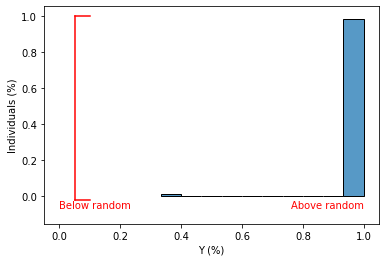

In [15]:
ax = sns.histplot(data=df_freq_all, x="Y", bins=10, stat="probability")

plt.plot([single.random_guess, single.random_guess], [1, -0.02], linewidth=1.5, color="red")
plt.plot([single.random_guess, single.random_guess + 0.05], [1, 1], linewidth=1.5, color="red")
plt.plot([single.random_guess, single.random_guess + 0.05], [-0.02, -0.02], linewidth=1.5, color="red")

plt.plot([0, 0], [0, -0.1], linewidth=1.5, color="white")

ax.text(0, -0.07, "Below random", horizontalalignment='left', size='medium', color='red')
ax.text(1, -0.07, "Above random", horizontalalignment='right', size='medium', color='red')

ax.set(xlabel="Υ (%)", ylabel="Individuals (%)")

### Frequency of all individuals in the oracle

In [16]:
def freqs_in_to_df(row):
    df = pd.DataFrame()
    
    freqs = {}
    
    for freq in row.freqs:
        if freq in row.oracle:
            freqs[freq] = row.freqs[freq]
    
    
    for k in freqs:
        v = freqs[k]
        
        df = df.append({
            "I": k,
            "Y": v
        }, ignore_index=True)
    return df

df_freq_in = freqs_in_to_df(single)
df_freq_in

I    Y
0       2  1.0
1      34  1.0
2      99  1.0
3     185  1.0
4     190  1.0
..    ...  ...
220  4396  1.0
221  4430  1.0
222  4437  1.0
223  4450  1.0
224  4488  1.0

[225 rows x 2 columns]

[Text(0.5, 0, 'Υ (%)'), Text(0, 0.5, 'Individuals (%)')]

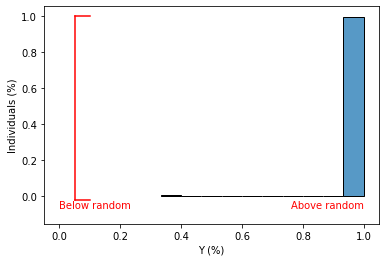

In [17]:
ax = sns.histplot(data=df_freq_in, x="Y", bins=10, stat="probability")

plt.plot([single.random_guess, single.random_guess], [1, -0.02], linewidth=1.5, color="red")
plt.plot([single.random_guess, single.random_guess + 0.05], [1, 1], linewidth=1.5, color="red")
plt.plot([single.random_guess, single.random_guess + 0.05], [-0.02, -0.02], linewidth=1.5, color="red")

plt.plot([0, 0], [0, -0.1], linewidth=1.5, color="white")

ax.text(0, -0.07, "Below random", horizontalalignment='left', size='medium', color='red')
ax.text(1, -0.07, "Above random", horizontalalignment='right', size='medium', color='red')

ax.set(xlabel="Υ (%)", ylabel="Individuals (%)")

### Frequency of all individuals not in the oracle

In [18]:
def freqs_not_to_df(row):
    df = pd.DataFrame()
    
    freqs = {}
    
    for freq in row.freqs:
        if freq not in row.oracle:
            freqs[freq] = row.freqs[freq]
    
    
    for k in freqs:
        v = freqs[k]
        
        df = df.append({
            "I": k,
            "Y": v
        }, ignore_index=True)
    return df

df_freq_not = freqs_not_to_df(single)
df_freq_not

I         Y
0   779  0.333333
1  2736  0.333333

[Text(0.5, 0, 'Υ (%)'), Text(0, 0.5, 'Individuals (%)')]

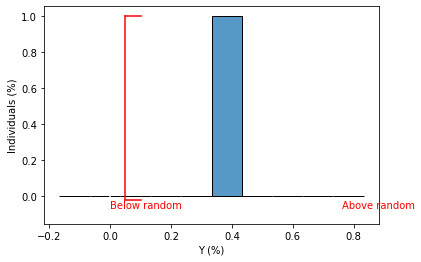

In [19]:
ax = sns.histplot(data=df_freq_not, x="Y", bins=10, stat="probability")

plt.plot([single.random_guess, single.random_guess], [1, -0.02], linewidth=1.5, color="red")
plt.plot([single.random_guess, single.random_guess + 0.05], [1, 1], linewidth=1.5, color="red")
plt.plot([single.random_guess, single.random_guess + 0.05], [-0.02, -0.02], linewidth=1.5, color="red")

plt.plot([0, 0], [0, -0.1], linewidth=1.5, color="white")

ax.text(0, -0.07, "Below random", horizontalalignment='left', size='medium', color='red')
ax.text(1, -0.07, "Above random", horizontalalignment='right', size='medium', color='red')

ax.set(xlabel="Υ (%)", ylabel="Individuals (%)")

## All individuals V2

In [20]:
def freqs_all_to_df(row):
    df = pd.DataFrame()
    bins = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1]
    
    freqs = row.freqs

    for k in freqs:
        v = freqs[k]
        
        df = df.append({
            "I": k,
            "Y": v
        }, ignore_index=True)    
    df.I = df.I.astype(int)
    
    df = df.groupby(pd.cut(df.Y, bins, right=False).rename("bins"))["Y"].count().reset_index()
    
    print(df)
    
    df.columns = ["Y", "I"]
    df.Y = [x for x in range(len(df))]
    df.I = df.I / df.I.sum()
    
    
    df.Y = ["[0.; 0.1[", "[0.1; 0.2[", "[0.2; 0.3[", "[0.3; 0.4[", "[0.4; 0.5[", "[0.5; 0.6[", "[0.6; 0.7[", "[0.7, 0.8[", "[0.8; 0.9[", "[0.9; 1.[", "1."]
    
    return df

df_freq_all = freqs_all_to_df(single)
df_freq_all

          bins    Y
0   [0.0, 0.1)    0
1   [0.1, 0.2)    0
2   [0.2, 0.3)    0
3   [0.3, 0.4)    3
4   [0.4, 0.5)    0
5   [0.5, 0.6)    0
6   [0.6, 0.7)    0
7   [0.7, 0.8)    0
8   [0.8, 0.9)    0
9   [0.9, 1.0)    0
10  [1.0, 1.1)  224


Y         I
0    [0.; 0.1[  0.000000
1   [0.1; 0.2[  0.000000
2   [0.2; 0.3[  0.000000
3   [0.3; 0.4[  0.013216
4   [0.4; 0.5[  0.000000
5   [0.5; 0.6[  0.000000
6   [0.6; 0.7[  0.000000
7   [0.7, 0.8[  0.000000
8   [0.8; 0.9[  0.000000
9    [0.9; 1.[  0.000000
10          1.  0.986784

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['single']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


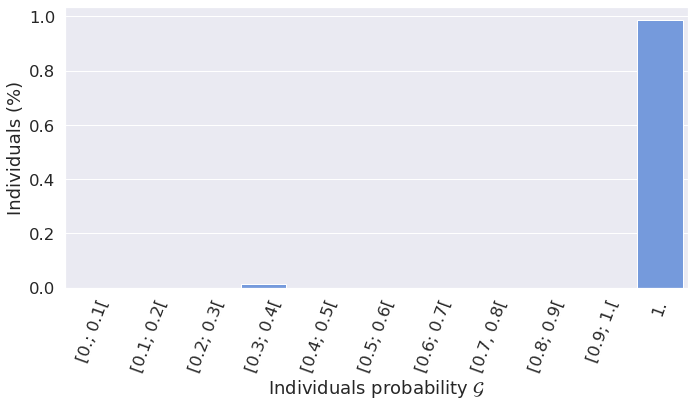

In [21]:
%pylab inline

sns.set(font_scale=1.5)
pylab.rcParams['figure.figsize'] = (10, 6)


ax = sns.barplot(data=df_freq_all, x="Y", y="I", color="cornflowerblue")

ax.set(xlabel="Individuals probability $\mathcal{G}$", ylabel="Individuals (%)")


plt.xticks(rotation=70)
plt.tight_layout()